# Lab 09 – Frequent Patterns

**DUE: Feb 26, 2024 (Monday)**  

Pair Programming: Optional, but highly encouraged

Name(s): Samuel Baldwin  
Class: CSCI 349 - Intro to Data Mining  
Section: 01 
Semester: Spring 2024
Instructors: Brian King, Joshua Stough


# Objectives
* `mlxtend` – your Python support for transactions, FP mining, and AR generation
* Because, you just can't get enough pandas

# Introduction
This lab will introduce you to frequent pattern mining and association rule generation using the `mlxtend` package.

## Work with someone!
As a reminder – I strongly recommend you work with someone for the remainder of the work in this course. You will get more out of the increasingly complex material. You don't need to work side by side in person. Discord is wonderful for having quick conversations, sharing your screen together, etc. Even better - both Visual Studio Code and Pycharm have plugins that let you do pair programming by sharing your IDE and working together on a single set of code. The work is going to become more challenging, and you and your partners will benefit from the shared, collaborative experience. Additionally, feel free to jump in and share ideas on Discord together.

If you work with someone, just a reminder - be sure to include BOTH partner names in the top header cell. And BOTH members should push up the notebook file to their respective repositories.

---
# Preparing for the lab


Work through this lab, and enter the answers to questions that are scattered throughout this lab. It is quite likely you'll need to add additional imports as you work through the lab.

## Installing mlxtend

Scikit-learn does not have the packages we need to do frequent pattern mining and association rule generation. These are available with a few alternative packages. We're going to use the package **`mlxtend`**, a machine learning set of extensions for python. This library adds many additional features and enhancements that were not included as part of the standard scikit-learn library.  See [mlxtend on Github](https://github.com/rasbt/mlxtend) for more information.

The `mlxtend` package is not available from the standard `defaults` channel in conda.  We'll install our package from the `conda-forge` channel, which contains an enormous number of packages put together by the conda community. I suggest not adding the channel to your conda installation, as it can substantially slow down future package updates. As usual, we'll do our conda management from the command line. (You can also use Anaconda Navigator, but do so at your own risk.)

### Follow these steps:

1. Open your terminal, and make sure your environment for the course is the active conda environment by typing `conda env list`
   * This will verify that `csci349` is the current environment (listed with an `*` next to it.) If it is not, then you didn't do the first step correctly.

2. Just incase you have a problem, I recommend making a backup of your environment by typing the following: `conda create --name csci349_backup --clone csci349`

   * (Of course, substitute `csci349` with whatever name you gave your course environment, if you did not use the name specified at the start of the semester.)

4.	`conda install mlxtend -c conda-forge`

   * This will install the `mlxtend` package directly from the `conda-forge` channel. NOTE: conda goes through a process of "solving your environment" to make sure that any dependencies to `mlxtend` are also installed and/or updated as needed. This may take a minute or so depending on the complexity of your installation.

NOTE – As of this writing, mlxtend is at 0.23.1, which has not been thoroughly tested with Python 3.10. However, my testing has not revealed any problems. You can accept the warnings that might appear while downloading and extracting the new packages.

### References:

These help pages for `mlxtend` are going to help you immensely when answering these questions:

- [Frequent Itemsets](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
- [Association Rules](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)



In [193]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

---
# Exercises

---
**1)**	[P] Add the import statements for mlxtend (DONE FOR YOU)

In [194]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

---
These first exercises are going to allow you to leverage the documentation from the mlxtend user guide online. The first few of these exercises are based on their examples with additional transactions they do not include. The second part of this lab will use a much more extensive transaction dataset.

---
**2a)**	[P] Go to the [apriori help page](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/). This site has some great, simple examples for you to refer to as you work through these exercises.

Copy the following list of lists... representing a small set of 8 transactons:

(DONE FOR YOU)

In [195]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Salsa'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt','Eggs'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Corn', 'Kidney Beans', 'Salsa', 'Onion', 'Milk', 'Eggs', 'Yogurt'],
           ['Milk', 'Yogurt', 'Ice cream', 'Eggs'],
           ['Onion','Eggs','Salsa','Apple','Milk', 'Kidney Beans']]
dataset


[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Salsa'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt', 'Eggs'],
 ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
 ['Corn', 'Kidney Beans', 'Salsa', 'Onion', 'Milk', 'Eggs', 'Yogurt'],
 ['Milk', 'Yogurt', 'Ice cream', 'Eggs'],
 ['Onion', 'Eggs', 'Salsa', 'Apple', 'Milk', 'Kidney Beans']]

---
**2b)** Now, copy the example code from the help page that transforms the list of lists to a `Transaction` collection, then to pandas `DataFrame` with the correct column names. Output your data frame.

In [196]:
# ANSWER
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Salsa,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,False,True
1,False,False,True,True,False,True,False,True,True,False,False,True
2,True,False,False,True,False,True,True,False,False,True,False,False
3,False,True,False,True,False,True,True,False,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False,False
5,False,True,False,True,False,True,True,False,True,True,False,True
6,False,False,False,True,True,False,True,False,False,False,False,True
7,True,False,False,True,False,True,True,False,True,True,False,False


---
**3)**	[P] Show the result of `describe()` and `info()` on your dataframe.

In [197]:
# ANSWER
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         8 non-null      bool 
 1   Corn          8 non-null      bool 
 2   Dill          8 non-null      bool 
 3   Eggs          8 non-null      bool 
 4   Ice cream     8 non-null      bool 
 5   Kidney Beans  8 non-null      bool 
 6   Milk          8 non-null      bool 
 7   Nutmeg        8 non-null      bool 
 8   Onion         8 non-null      bool 
 9   Salsa         8 non-null      bool 
 10  Unicorn       8 non-null      bool 
 11  Yogurt        8 non-null      bool 
dtypes: bool(12)
memory usage: 224.0 bytes
None


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Salsa,Unicorn,Yogurt
count,8,8,8,8,8,8,8,8,8,8,8,8
unique,2,2,2,1,2,2,2,2,2,2,2,2
top,False,False,False,True,False,True,True,False,True,False,False,True
freq,6,5,7,8,6,7,6,6,5,5,7,5


---
**4)**	[P] Following along the `mlxtend` user guide, use the apriori algorithm to final all frequent itemsets with a `min_support=0.6`. Show the resulting dataframe, and store the result, since you'll have many selection exercises next. All selection exercises must be done from this resulting frame. Set `use_colnames=True`. It'll be much easier to interpret your patterns.

In [198]:
# ANSWER
mx_df = apriori(df, min_support=0.6, use_colnames=True)
mx_df

,support,itemsets
0,1.000,(Eggs)
1,0.875,(Kidney Beans)
2,0.750,(Milk)
3,0.625,(Onion)
4,0.625,(Yogurt)
5,0.875,"(Kidney Beans, Eggs)"
6,0.750,"(Milk, Eggs)"
7,0.625,"(Onion, Eggs)"
8,0.625,"(Yogurt, Eggs)"
9,0.625,"(Kidney Beans, Milk)"


---
**5)** [P] Using the data frame of frequent patterns, select all frequent itemsets that have support >=  0.75



In [199]:
# ANSWER
subset75 = mx_df[mx_df["support"] >= 0.75]
subset75

,support,itemsets
0,1.000,(Eggs)
1,0.875,(Kidney Beans)
2,0.750,(Milk)
5,0.875,"(Kidney Beans, Eggs)"
6,0.750,"(Milk, Eggs)"


---
**6)** [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not one of them! It's entirely up to you. Do what makes the most sense to you.)



In [200]:
# ANSWER
frequent_itemsets = apriori(df, min_support=0.75, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.000,(Eggs)
1,0.875,(Kidney Beans)
2,0.750,(Milk)
3,0.875,"(Kidney Beans, Eggs)"
4,0.750,"(Milk, Eggs)"


---
**7)**	[P] Select the frequent itemsets that contain 'Milk' in the itemset.

In [201]:
# ANSWER
milk_frequent_itemsets = mx_df[mx_df['itemsets'].apply(lambda x: 'Milk' in x)]
milk_frequent_itemsets

,support,itemsets
2,0.750,(Milk)
6,0.750,"(Milk, Eggs)"
9,0.625,"(Kidney Beans, Milk)"
11,0.625,"(Kidney Beans, Milk, Eggs)"


---
**8)**	[P] Select the frequent itemsets that contain both 'Milk' **and** 'Eggs' in the itemset. (HINT: You should have 2 frequent itemsets selected. And, if you haven't learned about the `set` type in Python and all of the standard set operations, they can really make these types of questions much easier.)

In [202]:
# ANSWER
milk_eggs_frequent_itemsets = mx_df[mx_df['itemsets'].apply(lambda x: 'Milk' in x and 'Eggs' in x)]
milk_eggs_frequent_itemsets

,support,itemsets
6,0.750,"(Milk, Eggs)"
11,0.625,"(Kidney Beans, Milk, Eggs)"


---
**9)**	[P] Select the frequent itemsets that contain *either* an 'Onion' **or** 'Eggs' (or both) in the itemset. (HINT: You should have 9 frequent itemsets output.)

In [203]:
# ANSWER

onion_eggs_frequent_itemsets = mx_df[mx_df['itemsets'].apply(lambda x: 'Onion' in x or 'Eggs' in x)]
onion_eggs_frequent_itemsets

,support,itemsets
0,1.000,(Eggs)
3,0.625,(Onion)
5,0.875,"(Kidney Beans, Eggs)"
6,0.750,"(Milk, Eggs)"
7,0.625,"(Onion, Eggs)"
8,0.625,"(Yogurt, Eggs)"
10,0.625,"(Kidney Beans, Onion)"
11,0.625,"(Kidney Beans, Milk, Eggs)"
12,0.625,"(Kidney Beans, Onion, Eggs)"


---
**10)**	[P] Let's now dive into extracting association rules from frequent patterns. [The user guide on association rules](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) contains the all the information and guidance you need. (NOTE – they mention a function called `generate_rules()`. The function is `association_rules()`.)  Generate rules with a minimum confidence of 0.7. Store your resulting data frame called `rules`. Show the entire data frame. (You should have 20 rules).

In [204]:
# ANSWER
rules = association_rules(mx_df, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Kidney Beans),(Eggs),0.875,1.000,0.875,1.000000,1.000000,0.000000,inf,0.000000
1,(Eggs),(Kidney Beans),1.000,0.875,0.875,0.875000,1.000000,0.000000,1.0000,0.000000
2,(Milk),(Eggs),0.750,1.000,0.750,1.000000,1.000000,0.000000,inf,0.000000
3,(Eggs),(Milk),1.000,0.750,0.750,0.750000,1.000000,0.000000,1.0000,0.000000
4,(Onion),(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
5,(Yogurt),(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
6,(Kidney Beans),(Milk),0.875,0.750,0.625,0.714286,0.952381,-0.031250,0.8750,-0.285714
7,(Milk),(Kidney Beans),0.750,0.875,0.625,0.833333,0.952381,-0.031250,0.7500,-0.166667
8,(Kidney Beans),(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
9,(Onion),(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333


---
**11)**	[P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [205]:
# ANSWER
sorted_rules = rules.sort_values(by=['lift','confidence'], ascending = [False, False]).head(5)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Onion),(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
17,"(Onion, Eggs)",(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
19,(Onion),"(Kidney Beans, Eggs)",0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
8,(Kidney Beans),(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
16,"(Kidney Beans, Eggs)",(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000


---
**12)**	[P] Show all rules that have a 1.0 support for the antecedent.

In [206]:
# ANSWER
rules[rules['antecedent support']==1.0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Eggs),(Kidney Beans),1.0,0.875,0.875,0.875,1.0,0.0,1.0,0.0
3,(Eggs),(Milk),1.0,0.750,0.750,0.750,1.0,0.0,1.0,0.0


---
**13)**	[P] Show all rules that have at least 3 or more items represented in the rule (i.e. the size of union of the antecedent and consequent >= 3.)

In [207]:
# ANSWER
thirteen = rules[(rules['antecedents'].apply(len) + rules['consequents'].apply(len)) >= 3]
thirteen

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(Kidney Beans, Milk)",(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
11,"(Kidney Beans, Eggs)",(Milk),0.875,0.750,0.625,0.714286,0.952381,-0.031250,0.8750,-0.285714
12,"(Milk, Eggs)",(Kidney Beans),0.750,0.875,0.625,0.833333,0.952381,-0.031250,0.7500,-0.166667
13,(Kidney Beans),"(Milk, Eggs)",0.875,0.750,0.625,0.714286,0.952381,-0.031250,0.8750,-0.285714
14,(Milk),"(Kidney Beans, Eggs)",0.750,0.875,0.625,0.833333,0.952381,-0.031250,0.7500,-0.166667
15,"(Onion, Kidney Beans)",(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
16,"(Kidney Beans, Eggs)",(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
17,"(Onion, Eggs)",(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
18,(Kidney Beans),"(Onion, Eggs)",0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
19,(Onion),"(Kidney Beans, Eggs)",0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333


---
**14)**	[P] Select the rules that have confidence >= 0.75 and a lift > 1

In [208]:
# ANSWER
fourteen = rules[(rules['confidence'] > 0.75) & (rules['lift'] > 1)]
fourteen

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Onion),(Kidney Beans),0.625,0.875,0.625,1.0,1.142857,0.078125,inf,0.333333
17,"(Onion, Eggs)",(Kidney Beans),0.625,0.875,0.625,1.0,1.142857,0.078125,inf,0.333333
19,(Onion),"(Kidney Beans, Eggs)",0.625,0.875,0.625,1.0,1.142857,0.078125,inf,0.333333


---
# Chipotle Data

![Chipotle logo](https://s3-media0.fl.yelpcdn.com/bphoto/Kbj299Z7Txp8XW4f85OFzg/o.jpg)

Now, it's time to think about more food… so grab yerself some chips and salsa, and a burrito bowl and prepare to code with some indigestion. Why? Because you're going to work with a real dataset from **Chipotle**. Mmmmm….. queso.

These data were originally available for public use on Kaggle (https://www.kaggle.com/ )

>Get to know Kaggle at some point soon. If you have not yet set up an account on Kaggle, you should. It's an amazing repository of shared knowledge from data scientists worldwide, and also a platform for data mining and machine learning competitions which you might choose to take part in later.

This dataset represents a single day of transactions at a busy Chipotle store. Each observation represents one item purchased as part of an order. The quantity of that item is also indicated. Each order has one or more observations. The variables are:

* `order_id` : A unique identifier for one complete order
* `quantity` : The quantity of the item ordered
* `item_name` : The official name of the item ordered
* `choice_description` : A list of options for the item ordered. (For example, a Chicken Bowl, which is an official item, may have Tomatillo-Red Chili Salsa (Hot), Black Beans, Rice, Cheese, and Sour Cream listed in its choice description.
* `item_price` : The total price for the quantity of this item

The `item_name` variable is a nominal / categorical variable.`choice_description` contains a Python list of items that are part of the main item ordered. (For example, a `Chicken Bowl` may contain `Rice`, `Pinto Beans`, `Fresh Tomato Salsa`, etc.) The rest of the columns are self-explanatory.

Let's first review some basics… these should be "no-brainers" just to warm you up, and remind you of the importance of taking the time to check out your data, do some EDA, and preprocess it (before you eat it… ahem, I mean consume it? Munge on it? Preprocess it? Oh, never mind.)


---
**15)**	[P] Read in the Chipotle dataset:

```
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chip_df = pd.read_csv(url, sep = '\t')
```

DONE FOR YOU

In [209]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url, sep = '\t')

---
**16)**	[P] Show the result of `df_chip.info(verbose=True)`. You should have five variables.

In [210]:
# ANSWER
df_chip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


---
**17)**	[P] Show the output of `describe(include='all')`

In [211]:
# ANSWER
df_chip.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


---
**18)** [P] Get a sense of what the data look like. Display the first 10 observations.

In [212]:
### ANSWER
df_chip.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


---
**19)**	[M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types. Which ones, and what do you need to do with them? (HINT: When a variable is read in as a type `object`, that's a good indicator you have some work to do. Consider that order_id is a nominal, however, most businesses have some transaction id that is a number that increases over time, so just leave it as a number.)

**ANSWER:**
It looks like the item_name, choice_description, and item_price variables can all be adjusted. The item_price variable can probably just be parsed to examine the doallar value by removing the $, the item name can probably be a categorical variable, and the choice_description can probably be adjusted to be the same. 

---
**20)**	 [P] Let's start doing some preprocessing. Convert the `item_price` field to a floating-point number, then show the result of `df_chip.item_price.describe()` to show that it is indeed a numeric variable now.

In [213]:
# ANSWER
df_chip['item_price'] = df_chip['item_price'].replace('[$,]', '', regex=True).astype(float)
df_chip.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

---
**21)**	[P] Now, convert the `item_name` to a categorical variable.

In [214]:
# ANSWER
df_chip['item_name'] = df_chip['item_name'].astype('category')

---
**22)**	[P] How many unique `item_name` values are there?

In [215]:
# ANSWER
df_chip.item_name.nunique()

50

---
**23)**	[P,M] Show all of the unique values in `item_name`. Do you see any potential problems? (Leave them! Don't fix them. Just pay close attention. Need a hint? Salsa)

In [216]:
# ANSWER
df_chip.item_name.unique()


['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl', ..., 'Barbacoa Salad Bowl', 'Salad', 'Veggie Crispy Tacos', 'Veggie Salad', 'Carnitas Salad']
Length: 50
Categories (50, object): ['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', ..., 'Veggie Crispy Tacos', 'Veggie Salad', 'Veggie Salad Bowl', 'Veggie Soft Tacos']

**ANSWER:**
Some of the specific "unique" categories appear to be incredibly similar, without much definition as to how they are different. Veggie Salad and Veggie Salad Bowl don't seem to have much difference, and there isn't a way to be sure if that is intentional. 

---
**24)**	[P] How many distinct orders are there?

In [217]:
# ANSWER
df_chip.order_id.nunique()

1834

---
**25)**	[P,M] Show a **boxplot** of the number of line items per order. Do NOT consider the quantity of each item, just the total count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count the number of items per order.) Then, comment on the distribution of the total number of items per order.

/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='count'>

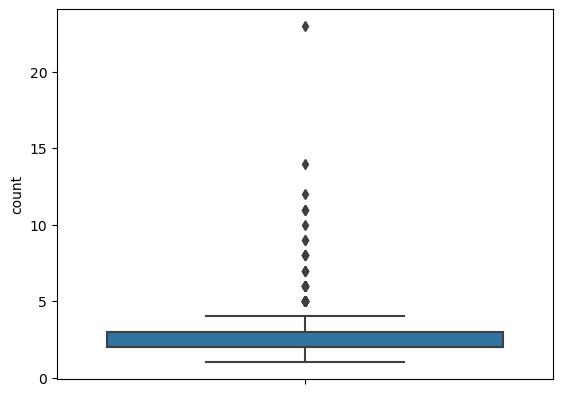

In [218]:
# ANSWER
sns.boxplot(df_chip, y=df_chip.order_id.value_counts())

**ANSWER:**
It appears that the majority of orders contain one or two items, with three, four and five being less common. 




---
**26)**	[P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order. (The box plot will be similar to the previous, with the exception that there will be more outliers, and the maximum outlier will be 35.)

/Users/samuelbaldwin/anaconda3/envs/csci349/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='quantity'>

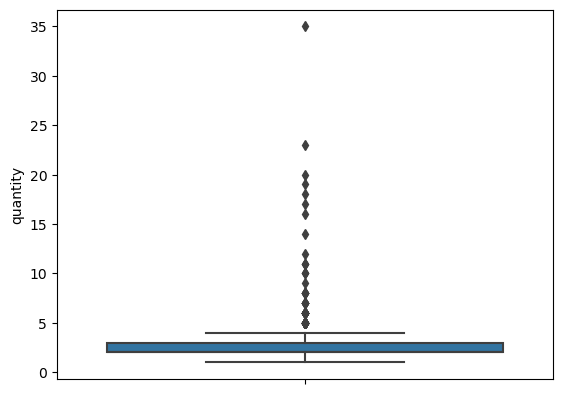

In [219]:
sns.boxplot(df_chip, y=df_chip.groupby('order_id')['quantity'].sum())

---
**27)**	[P] OK. Let's mine! What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. (Be sure to consider the quantity of each item order!)

In [220]:
# ANSWER
df_chip['item_name'].value_counts().head(5)

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64

---
**28)**	[P] What is the total number of `"Steak Burrito"`s ordered?

In [221]:
# ANSWER
df_chip['item_name'].value_counts().get("Steak Burrito")

368

---
**29)**	[P] What is the mean price for an order (NOTE – This is NOT just a mean of the `item_price` column!)

In [222]:
# ANSWER
mean = df_chip.groupby('order_id')['item_price'].sum().mean()
mean

18.811428571428568

---
**30)**	[P] What was total revenue for the day?

In [223]:
# ANSWER
df_chip['revenue'] = df_chip['item_price'] * df_chip['quantity']
df_chip['revenue'].sum()

39237.02

---
**31)**	[P] What was the largest total price for a single order? Show the order number and the total price.

In [224]:
# ANSWER
max_price = df_chip.groupby('order_id')['revenue'].sum().max()
index_max = df_chip.groupby('order_id')['revenue'].sum().idxmax()
print(f'Max price of {max_price} for order {index_max}')

Max price of 1074.24 for order 1443


---
**32)** Show the entire order to your answer to the previous question

In [225]:
# ANSWER
order = df_chip[df_chip['order_id'] == 1443]
order

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3599,1443,7,Bottled Water,NaN,10.50,73.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49,6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25
3604,1443,2,Bottled Water,NaN,3.00,6.00


---
**33)**	[P] What order had the largest total quantity of items purchased? Show the order number and the total number of items

In [226]:
# ANSWER
max_quant = df_chip.groupby('order_id')['quantity'].sum().max()
quant_ind = df_chip.groupby('order_id')['quantity'].sum().idxmax()
print(f'Max quantity of {max_quant} for order {quant_ind}')

Max quantity of 35 for order 1443


**34)**	[P] Show the entire order of your answer to the previous question

In [227]:
# ANSWER
order

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3599,1443,7,Bottled Water,NaN,10.50,73.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49,6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25
3604,1443,2,Bottled Water,NaN,3.00,6.00


---
## Frequent Patterns in Chipotle Data

**35)**	[P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as part of an `order_id`. However, the data are not read in this way. You need to transform this dataset to a collection of *binary encoded transactions*, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle. Convert your data. Your resulting data frame should have an index representing the `order_id`, and columns representing every possible item from the `item_name` variable. For now, a transaction will ignore the quantity of item purchased. And, ignore the `choice_description` variable. Only work with `item_name`.

In [228]:
# ANSWER
encoded_df = pd.get_dummies(df_chip['item_name'], prefix = 'item')
df_binary = pd.concat([df_chip['order_id'], encoded_df], axis=1)
combined_df = df_binary.groupby('order_id').sum().astype(bool).reset_index()
combined_df = combined_df.drop('order_id', axis=1)

---
**36)** Show the first 10 observations from your transaction data

In [229]:
# ANSWER
combined_df.head(10)

,item_6 Pack Soft Drink,item_Barbacoa Bowl,item_Barbacoa Burrito,item_Barbacoa Crispy Tacos,item_Barbacoa Salad Bowl,item_Barbacoa Soft Tacos,item_Bottled Water,item_Bowl,item_Burrito,item_Canned Soda,...,item_Steak Crispy Tacos,item_Steak Salad,item_Steak Salad Bowl,item_Steak Soft Tacos,item_Veggie Bowl,item_Veggie Burrito,item_Veggie Crispy Tacos,item_Veggie Salad,item_Veggie Salad Bowl,item_Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


---
**37)**	[P/M] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened? Why?

In [230]:
# ANSWER
frequent_itemsets = apriori(combined_df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets


**ANSWER:**

It appears that ther are no elements with that level of minimum support, give the incredibly wide range of elements that could be applied to this. 


---
**38)**	[P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least. NOTE: That number essentially represents the absolute support for 1-itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.) (HINT: You already did most of this in a previous question!)

(HINT: The item with the highest support is 33.5%!)

In [231]:
# ANSWER
combined_df.sum()/len(combined_df)*100

item_6 Pack Soft Drink                         2.944384
item_Barbacoa Bowl                             3.326063
item_Barbacoa Burrito                          4.798255
item_Barbacoa Crispy Tacos                     0.599782
item_Barbacoa Salad Bowl                       0.490731
item_Barbacoa Soft Tacos                       1.363141
item_Bottled Water                             8.396947
item_Bowl                                      0.109051
item_Burrito                                   0.218103
item_Canned Soda                               5.125409
item_Canned Soft Drink                        15.049073
item_Carnitas Bowl                             3.653217
item_Carnitas Burrito                          3.162486
item_Carnitas Crispy Tacos                     0.381679
item_Carnitas Salad                            0.054526
item_Carnitas Salad Bowl                       0.327154
item_Carnitas Soft Tacos                       2.071974
item_Chicken Bowl                             33

---
**39)**	[P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have many variables, and most observations use only a handful of them. This is the definition of a sparse dataset. You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report only the top 10 frequent items sorted by decreasing support order.

In [232]:
# ANSWER
frequent_itemsets = apriori(combined_df, min_support=0.005, use_colnames=True)
print(f'There were {len(frequent_itemsets)} frequent itemsets reported')
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

There were 146 frequent itemsets reported


,support,itemsets
11,0.335333,(item_Chicken Bowl)
12,0.266630,(item_Chicken Burrito)
18,0.258451,(item_Chips and Guacamole)
29,0.186478,(item_Steak Burrito)
7,0.150491,(item_Canned Soft Drink)
16,0.113413,(item_Chips)
28,0.102508,(item_Steak Bowl)
5,0.083969,(item_Bottled Water)
87,0.081243,"(item_Chicken Bowl, item_Chips and Guacamole)"
85,0.066521,"(item_Chicken Bowl, item_Chips)"


---
**40)**	[M] [OPTIONAL, but a good idea!] - In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

**ANSWER:**
Support - Frequency of values in a dataset that a given itemset appears
Confidence - Likelyhood a rule is true
Lift - How much more like the consequent is given the antecdent
Leverage - Difference between observed freq of antecedent and consequent compared to them being independent
Conviction - Compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y.

---
**41)**	[P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [233]:
# ANSWER
chip_rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
print(f'There are {len(chip_rules)} rules output in total')

There are 108 rules output in total


**42)**	[P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

In [234]:
# ANSWER
chip_rules.loc[chip_rules.lift > 2].sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
92,"(item_Chips, item_Bottled Water)",(item_Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337,0.592135
91,"(item_Chicken Bowl, item_Bottled Water)",(item_Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061,0.748685
23,(item_Canned Soda),(item_Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467,0.540805
96,"(item_Chicken Bowl, item_Canned Soft Drink)",(item_Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883,0.681569
90,"(item_Chicken Bowl, item_Chips)",(item_Bottled Water),0.066521,0.083969,0.015267,0.229508,2.733234,0.009681,1.188891,0.679322
15,(item_Bottled Water),(item_Chips),0.083969,0.113413,0.019084,0.227273,2.003934,0.009561,1.147347,0.546905
95,(item_Bottled Water),"(item_Chicken Bowl, item_Chips)",0.083969,0.066521,0.015267,0.181818,2.733234,0.009681,1.140918,0.692262
14,(item_Chips),(item_Bottled Water),0.113413,0.083969,0.019084,0.168269,2.003934,0.009561,1.101355,0.565068
101,(item_Chips),"(item_Chicken Bowl, item_Canned Soft Drink)",0.113413,0.060523,0.019084,0.168269,2.780232,0.012220,1.129544,0.722228
94,(item_Chips),"(item_Chicken Bowl, item_Bottled Water)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011000,1.112080,0.812687


---
**43)**	[M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist. Be careful not to say, "if your customers purchase water and chips, they are also going to buy chicken bowls." Be careful with your conclusions. (What do strong association rules convey? Only interpret the rule with the interestingess measures.)

```
                          antecedents                        consequents  \
56             (Bottled Water, Chips)                     (Chicken Bowl)

    antecedent support  consequent support   support  confidence      lift  \
56            0.019084            0.335333  0.015267    0.800000  2.385691

    leverage  conviction
56  0.008868    3.323337
```


**ANSWER:**
It appears that according to this rule, with a confidence of 80% should a customer purchase water and chips, that customer will purchase a chicken bowl. Additionally, given that the consequent support is larger than the antecedent support, we can say that if a custoper purchases a Chicken Bowl, they are more likely to purchase Bottled Water and Chips than the opposite. 
This is due in part to the fact that Chicken bowl is more likelyt o be purchased in general, but it is indicative of the fact that there is a strong level of confidence that a transation that contains one of these will contain another. 

---
**44)**	[P] Suppose your boss is interested in what items are most likely related to a purchase of `"Chips and Guacamole"`. Using your rule set generated, first select the rules that have `"Chips and Guacamole"` listed in the consequent.  Sort the rules by confidence, then by lift. And interpret your findings. Identify the item(s) that are the most suggestive of including `"Chips and Guacamole"` when purchased, and state why.

(NOTE: These interpretive questions at the end here often have no one perfect solution. If you give a good answer with a sound, reasonable justification, you're good.)

In [235]:
# ANSWER
output = chip_rules[chip_rules.consequents == {'item_Chips and Guacamole'}].sort_values(by='confidence', ascending=False)
output

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(item_6 Pack Soft Drink),(item_Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443,0.345586
88,(item_Veggie Burrito),(item_Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682,0.253919
87,(item_Veggie Bowl),(item_Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581,0.225140
74,(item_Chicken Soft Tacos),(item_Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943,0.144217
83,(item_Steak Bowl),(item_Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675,0.092735
6,(item_Barbacoa Burrito),(item_Chips and Guacamole),0.047983,0.258451,0.011996,0.250000,0.967300,-0.000406,0.988731,-0.034292
46,(item_Chicken Bowl),(item_Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653,-0.091277
65,(item_Chicken Burrito),(item_Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979,-0.129005
32,(item_Canned Soft Drink),(item_Chips and Guacamole),0.150491,0.258451,0.033806,0.224638,0.869168,-0.005089,0.956390,-0.150521
84,(item_Steak Burrito),(item_Chips and Guacamole),0.186478,0.258451,0.041439,0.222222,0.859822,-0.006756,0.953420,-0.166946


**ANSWER:**
There are some items that are the most commonly associated with Chips and Guacamole, those being Soft Drinks, Veggie Burritos and Bowls and Chicken Soft Tacos. Realistically there are a number of reasons that these would be the most likely, including the common appearance of soft drinks, and the fact that the other associated items are meal items rather than chips and guacamole which is traditionally considered a side item. 
